In [11]:
# linear regression = demand prediction model
import pandas as pd
import numpy as np

In [12]:
Combined = pd.read_csv('combined_detail_cleaned.csv',encoding= 'ISO-8859-1')

In [13]:
#Get the value of the feature labels
FEATURES = list(Combined.columns.values)

In [14]:
# Analyse the correlations between max_total_demand with other numerical features, pick the features with abs correlation over 0.3
correlation_table = Combined[FEATURES].corr(method='pearson')
Possible_features = list(correlation_table.loc[abs(correlation_table['max_total_demand']) > 0.3].index)
Possible_features.remove('max_total_demand')

In [15]:
#check the correlations between these possible features
Independent_correlation_table = Combined[Possible_features].corr(method='pearson')
Independent_correlation_table

,temperature_min,temperature_9am,temperature_3pm
temperature_min,1.000000,0.916641,0.666270
temperature_9am,0.916641,1.000000,0.765603
temperature_3pm,0.666270,0.765603,1.000000


In [16]:
#Prepare the possible features label and output label again
Possible_features.append('max_total_demand')
#Analysis the correlation relationship between output and filtered features
Combined[Possible_features].corr(method='pearson')

,temperature_min,temperature_9am,temperature_3pm,max_total_demand
temperature_min,1.000000,0.916641,0.666270,-0.499240
temperature_9am,0.916641,1.000000,0.765603,-0.401323
temperature_3pm,0.666270,0.765603,1.000000,-0.325252
max_total_demand,-0.499240,-0.401323,-0.325252,1.000000


In [17]:
# Since all possible features are self correlated, then just pick the one with highest correlation with output
Final_features = list(correlation_table.loc[abs(correlation_table['max_total_demand']) > 0.45].index)
Final_features.remove('max_total_demand')
Final_features

['temperature_min']

In [18]:
#Set the features and output into X , y
X = Combined[Final_features]
y = Combined['max_total_demand']

Model y = [-112.6148829]['temperature_min'] +  7374.4044972895335, the r2_score is -0.004151406159014215
Model y = [-107.5593349]['temperature_min'] +  7323.788722988932, the r2_score is 0.07986532903011845
Model y = [-103.03533254]['temperature_min'] +  7281.396503429833, the r2_score is 0.3543378605150912
Model y = [-104.63187327]['temperature_min'] +  7297.788711944871, the r2_score is 0.3044004894717397
Model y = [-100.88417993]['temperature_min'] +  7254.720072854396, the r2_score is 0.32230799365732965
Model y = [-100.87168259]['temperature_min'] +  7254.17082276773, the r2_score is 0.5261138598590477
Model y = [-113.7520387]['temperature_min'] +  7371.183245891974, the r2_score is -0.17843716479663851
Model y = [-100.18641333]['temperature_min'] +  7246.526368528687, the r2_score is 0.4482458440032411
Model y = [-107.45408644]['temperature_min'] +  7316.097751553427, the r2_score is 0.15479853624682471
Model y = [-97.026145]['temperature_min'] +  7213.081461713427, the r2_score 

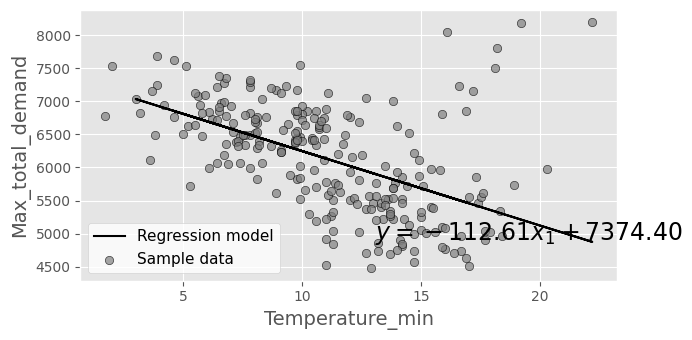

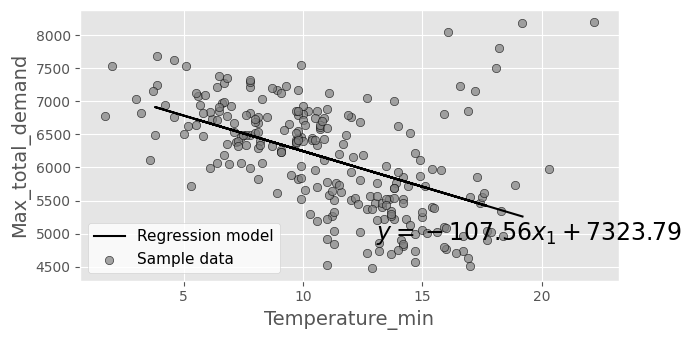

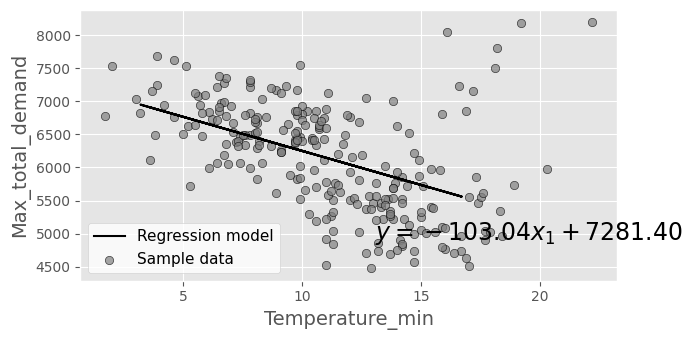

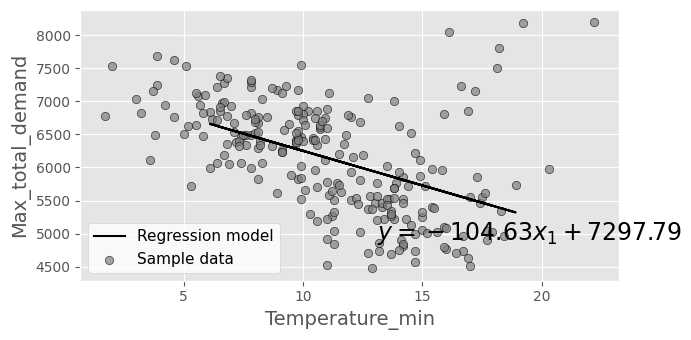

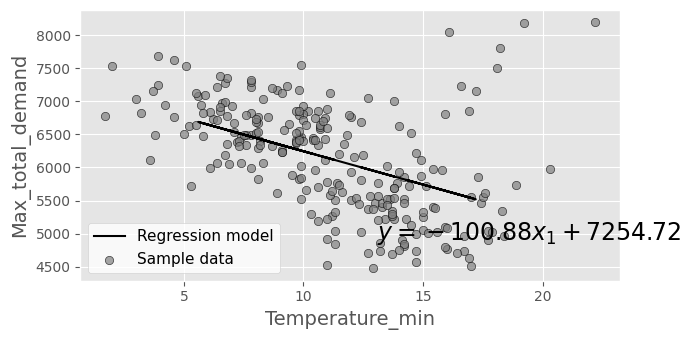

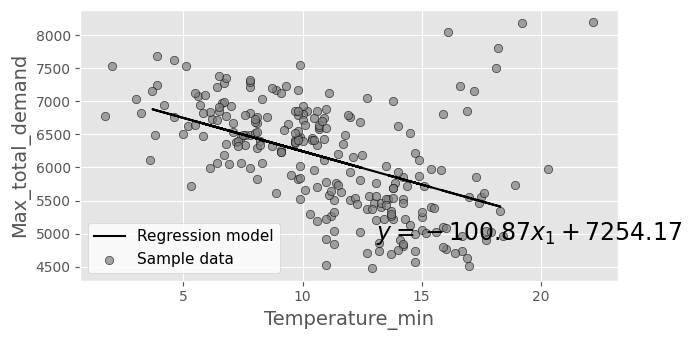

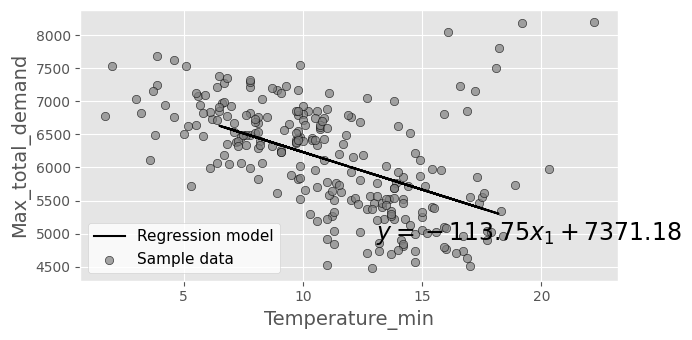

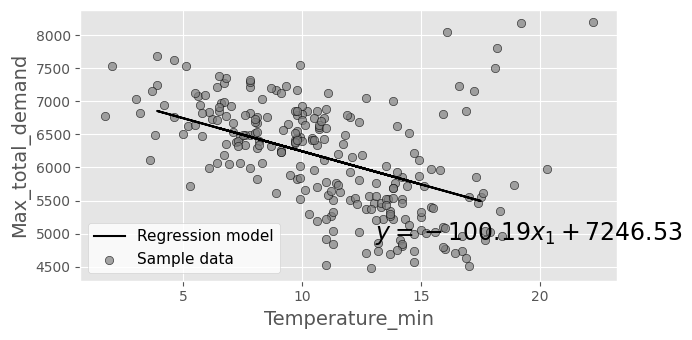

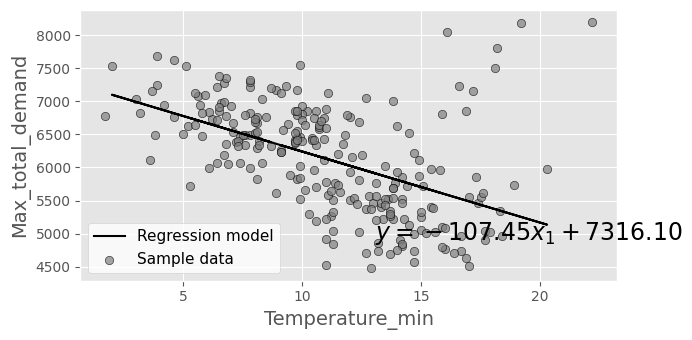

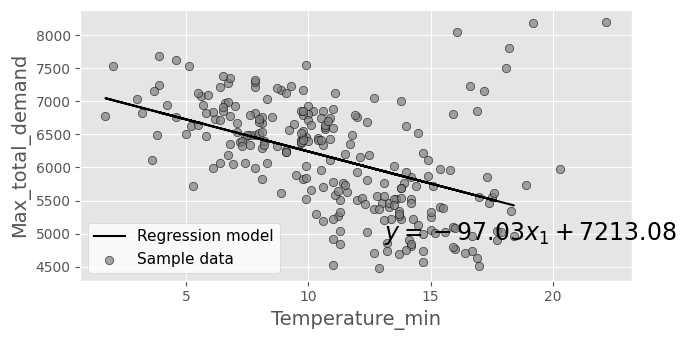

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold

# K-fold Method (cross validation) 
k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
R2_score = []

# Implementation of K-fold Method
for train_index, test_index in kf.split(X):
    # Split Training and Test sets
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]   
    
    # Step 1: Instantiate 
    lm = linear_model.LinearRegression()
    
    # Step 2: Fit
    lm.fit(X_train, y_train)
    #print(lm.coef_,lm.intercept_)
    # Step 3: Predict
    y_pred = lm.predict(X_test)  
    
    
    # Step 4: Evaluate
    R2_score.append(r2_score(y_test, y_pred))
    
    print(f'Model y = {lm.coef_}{Final_features} +  {lm.intercept_}, the r2_score is {r2_score(y_test, y_pred)}')
    
    #Plot the linear regression model
    import matplotlib.pyplot as plt

    plt.style.use('default')
    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=(7, 3.5))

    ax.plot(X_test, y_pred, color='k', label='Regression model')
    ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
    ax.set_ylabel('Max_total_demand', fontsize=14)
    ax.set_xlabel('Temperature_min', fontsize=14)
    ax.legend(facecolor='white', fontsize=11)
    ax.text(0.55, 0.15, '$y = %.2f x_1 + %.2f $' % (lm.coef_[0], abs(lm.intercept_)), fontsize=17, transform=ax.transAxes)

    fig.tight_layout()

print(R2_score)
print(f'Average score is {sum(R2_score)/k}')

In [ ]:
Combined['temperature_min'].describe()

In [ ]:
Combined['temperature_min'].describe()

# All below are just code for self refence

In [ ]:
Combined[Final_features].dtypes

In [ ]:
Combined['AVGt_tem'] = round((Combined['temperature_min'] + Combined['temperature_max'] + Combined['temperature_9am'] + Combined['temperature_3pm'])/4, 2)
Possible_features = ['AVGt_tem']
#+ round(total_sales['tickets_sold'] / total_sales['max_capacity'], 2)

In [ ]:
Possible_Select_FEATURES.append('max_total_demand')
Possible_Select_FEATURES

In [ ]:
Combined[Possible_Select_FEATURES].corr(method='pearson')

In [ ]:
Possible_features = [ 'temperature_max',
                     'sunshine',
                     'humidity_9am',
                     'cloud_9am',
                     'wind_speed_9am',
                    'max_total_demand']

In [ ]:
Combined[Possible_features].corr(method='pearson')

In [ ]:
X = Combined[Possible_features]
y = Combined['max_total_demand']

# With K folder method

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold

k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
R2_score = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]    
    lm = linear_model.LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    
    
    R2_score.append(r2_score(y_test, y_pred))

print(R2_score)
print(sum(R2_score)/k)


In [ ]:
y_test

In [ ]:
# Step 0: Preprocess
# randomly select 80% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Without K folder method

In [ ]:
# Step 1: Instantiate
lm = linear_model.LinearRegression()

In [ ]:
# Step 2: Fit
lm.fit(X_train, y_train)

In [ ]:
print(lm.coef_,lm.intercept_)

In [ ]:
r2_test = lm.score(X_test, y_test)
print(r2_test)

In [ ]:
# Step 3: Predict
y_pred = lm.predict(X_test)

In [ ]:
mean_squared_error(y_pred, y_test)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
# Step 4: Evaluate
print(f'mean squared error: {mean_squared_error(y_pred, y_test)}')
print(f'r2 score: {r2_score(y_test, y_pred)}')

In [ ]:
# Calculate the Pearson's R correlation metric
Combined[FEATURES] = Combined[FEATURES].astype(float)
Combined[FEATURES].corr(method='pearson')